## Introduction

This dataset provides information about patients and their risk factors for stroke. It contains various attributes related to demographics, medical history and lifestyle factors.

## Prepare for analysis

### Load packages and the dataset

In [ ]:
import pandas as pd
from feature_engineering.preprocessing import (
    describe_data,
    detect_missing_values,
    most_frequent_values,
    unique_values,
)
from feature_engineering.plotting import (
    plot_distributions,
    plot_target_distribution,
    plot_correlation_matrix,
    plot_feature_vs_target,
)
from data.load_data import load_data


## Preliminary data inspection

### Quick glimpse of the data

In [2]:
df = load_data("data/raw_data/raw_data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Explore the dataset

In [4]:
# Describe the data
print(describe_data(df))

                  id  gender          age  hypertension  heart_disease  \
count    5110.000000    5110  5110.000000   5110.000000    5110.000000   
unique           NaN       3          NaN           NaN            NaN   
top              NaN  Female          NaN           NaN            NaN   
freq             NaN    2994          NaN           NaN            NaN   
mean    36517.829354     NaN    43.226614      0.097456       0.054012   
std     21161.721625     NaN    22.612647      0.296607       0.226063   
min        67.000000     NaN     0.080000      0.000000       0.000000   
25%     17741.250000     NaN    25.000000      0.000000       0.000000   
50%     36932.000000     NaN    45.000000      0.000000       0.000000   
75%     54682.000000     NaN    61.000000      0.000000       0.000000   
max     72940.000000     NaN    82.000000      1.000000       1.000000   

       ever_married work_type Residence_type  avg_glucose_level          bmi  \
count          5110      5110  

In [6]:
# Display column data types
print("Data Types:")
print(df.dtypes)

Data Types:
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


###### The dataset contains 12 attributes, with a mix of:
###### Numerical columns: id, age, hypertension, heart_disease, avg_glucose_level, bmi, and stroke.
###### Categorical columns: gender, ever_married, work_type, Residence_type, and smoking_status.

## Few statistics on the data

### missing values

In [5]:
print(detect_missing_values(df))

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


bmi has 201 missing values out of a total of 5110 rows, while all other columns have no missing values.

### most frequent data

In [5]:
print(most_frequent_values(df))

                      id  gender    age hypertension heart_disease  \
Total               5110    5110   5110         5110          5110   
Most Frequent Item  9046  Female   78.0            0             0   
Frequency              1    2994    102         4612          4834   
Percent of Total    0.02  58.591  1.996       90.254        94.599   

                   ever_married work_type Residence_type avg_glucose_level  \
Total                      5110      5110           5110              5110   
Most Frequent Item          Yes   Private          Urban             93.88   
Frequency                  3353      2925           2596                 6   
Percent of Total         65.616    57.241         50.802             0.117   

                      bmi smoking_status  stroke  
Total                4909           5110    5110  
Most Frequent Item   28.7   never smoked       0  
Frequency              41           1892    4861  
Percent of Total    0.835         37.025  95.127  


### unique values

In [3]:
print(unique_values(df))

                 id  gender   age  hypertension  heart_disease  ever_married  \
Total          5110    5110  5110          5110           5110          5110   
Unique Values  5110       3   104             2              2             2   

               work_type  Residence_type  avg_glucose_level   bmi  \
Total               5110            5110               5110  4909   
Unique Values          5               2               3979   418   

               smoking_status  stroke  
Total                    5110    5110  
Unique Values               4       2  


### outliers

The continuous variables avg_glucose_level and bmi are likely to have outliers because of the wide distribution of their values.

Check the distributions of avg_glucose_level and bmi for outliers or extreme values.

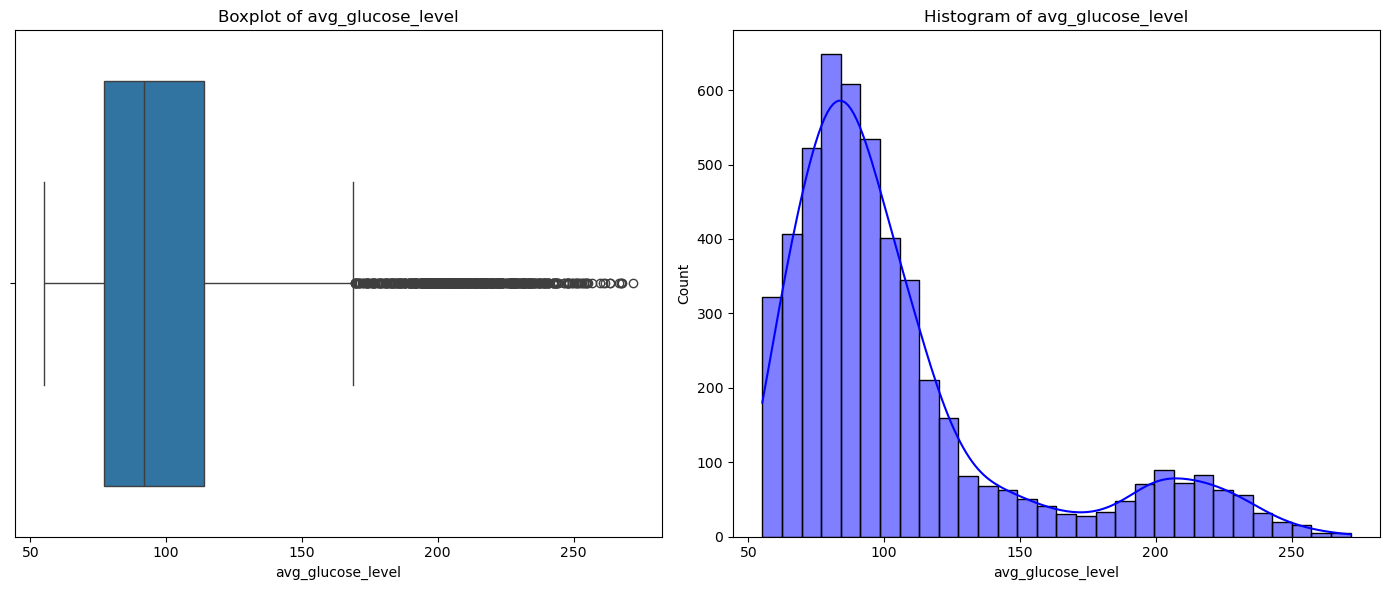

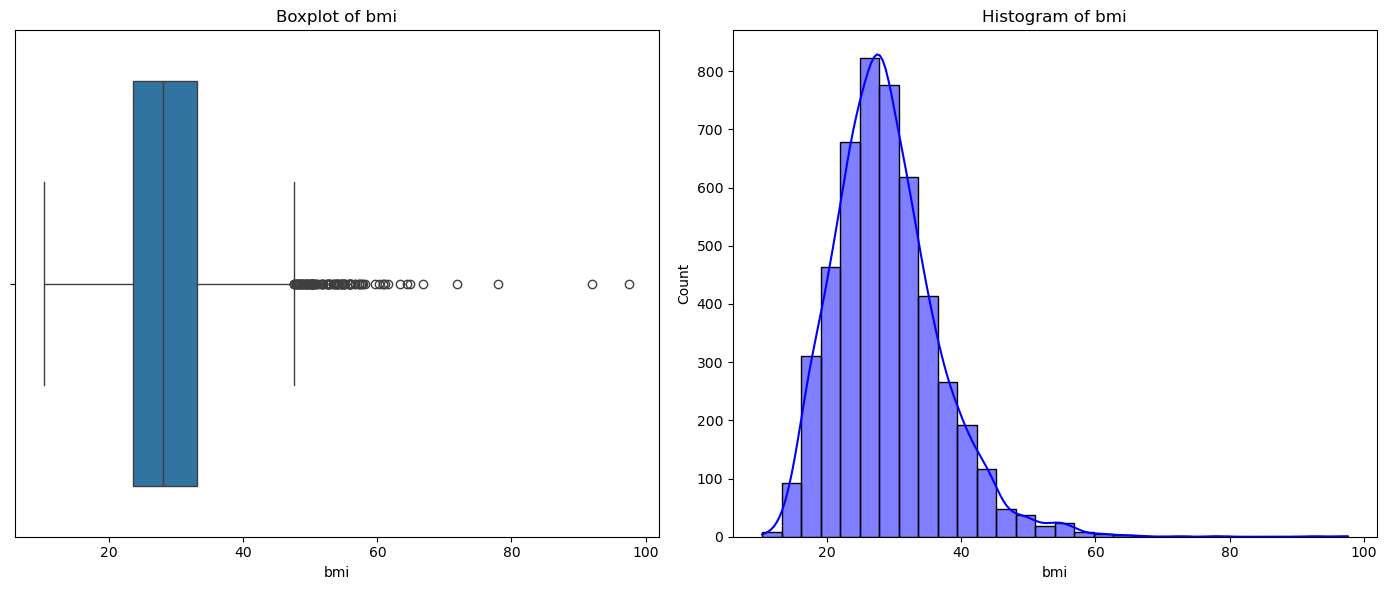

In [3]:
plot_distributions(df, "avg_glucose_level")
plot_distributions(df, "bmi")

1. avg_glucose_level

The boxplot shows a significant number of outliers on the higher end (above ~150). The histogram shows that the distribution is right-skewed with a peak around 100.

 There is a clear outlier problem in avg_glucose_level !

2. bmi

The boxplot shows extreme values range beyond 50 and even close to 100, which are biologically unusual. The distribution is close to normal, peaking around 25–30, which is expected for BMI data.

There is an outlier problem in bmi at the high end, and since the extreme values are biologically unusual, we consider remove them.